<a href="https://colab.research.google.com/github/NishmithaJR/Data-Analytics-Project/blob/main/Brain_hemorrhage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Data Analytics/hemorrhage_diagnosis.csv")
df

,PatientNumber,SliceNumber,Intraventricular,Intraparenchymal,Subarachnoid,Epidural,Subdural,No_Hemorrhage,Fracture_Yes_No
0,49,1,0,0,0,0,0,1,0
1,49,2,0,0,0,0,0,1,0
2,49,3,0,0,0,0,0,1,0
3,49,4,0,0,0,0,0,1,0
4,49,5,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
2496,130,27,0,0,0,0,0,1,0
2497,130,28,0,0,0,0,0,1,0
2498,130,29,0,0,0,0,0,1,0
2499,130,30,0,0,0,0,0,1,0


**How many people are diagnosed with brain hemorrhage?**

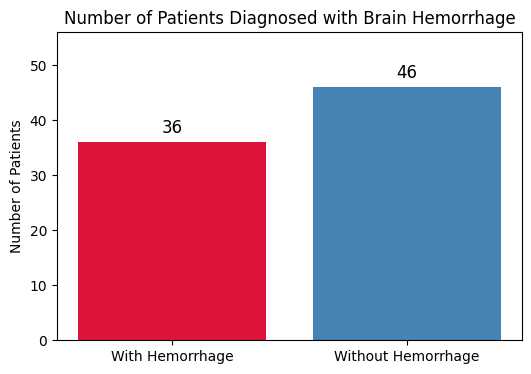

In [ ]:
# Identify patients with at least one hemorrhage
hemorrhage_cols = ['Intraventricular', 'Intraparenchymal', 'Subarachnoid', 'Epidural', 'Subdural']
df['Has_Hemorrhage'] = df[hemorrhage_cols].sum(axis=1) > 0

# Unique patient counts
patients_with_hemorrhage = df[df['Has_Hemorrhage']]['PatientNumber'].unique()
patients_without_hemorrhage = df[~df['PatientNumber'].isin(patients_with_hemorrhage)]['PatientNumber'].unique()

# Prepare data for plotting
counts = {
    'With Hemorrhage': len(patients_with_hemorrhage),
    'Without Hemorrhage': len(patients_without_hemorrhage)
}

# Plotting
plt.figure(figsize=(6, 4))
bars = plt.bar(counts.keys(), counts.values(), color=['crimson', 'steelblue'])
plt.title('Number of Patients Diagnosed with Brain Hemorrhage')
plt.ylabel('Number of Patients')

# Add counts on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, int(yval), ha='center', va='bottom', fontsize=12)

plt.ylim(0, max(counts.values()) + 10)
plt.show()

**How many patients diagnosed with brain hemorrhage has fracture?**

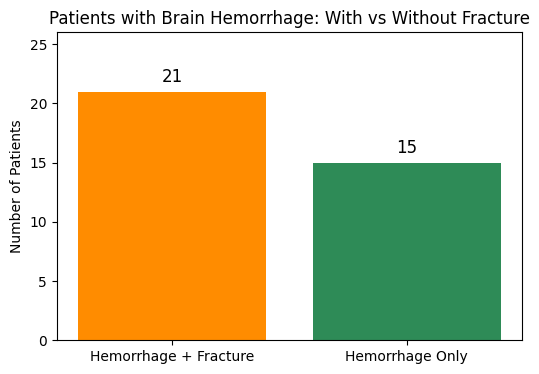

In [ ]:
# Mark slices with any hemorrhage
hemorrhage_cols = ['Intraventricular', 'Intraparenchymal', 'Subarachnoid', 'Epidural', 'Subdural']
df['Has_Hemorrhage'] = df[hemorrhage_cols].sum(axis=1) > 0

# Mark slices with fracture
df['Has_Fracture'] = df['Fracture_Yes_No'] == 1

# Identify patients with hemorrhage
patients_with_hemorrhage = df[df['Has_Hemorrhage']]['PatientNumber'].unique()

# Among them, check who also has fracture
df_hem = df[df['PatientNumber'].isin(patients_with_hemorrhage)]
patients_with_hem_and_fracture = df_hem[df_hem['Has_Fracture']]['PatientNumber'].unique()

# Count patients
with_both = len(patients_with_hem_and_fracture)
only_hem = len(set(patients_with_hemorrhage) - set(patients_with_hem_and_fracture))

# Data for plotting
counts = {
    'Hemorrhage + Fracture': with_both,
    'Hemorrhage Only': only_hem
}

# Plotting
plt.figure(figsize=(6, 4))
bars = plt.bar(counts.keys(), counts.values(), color=['darkorange', 'seagreen'])
plt.title('Patients with Brain Hemorrhage: With vs Without Fracture')
plt.ylabel('Number of Patients')

# Add counts on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, int(yval), ha='center', va='bottom', fontsize=12)

plt.ylim(0, max(counts.values()) + 5)
plt.show()

**Which type of brain hemorrhage is most common among these patients?**

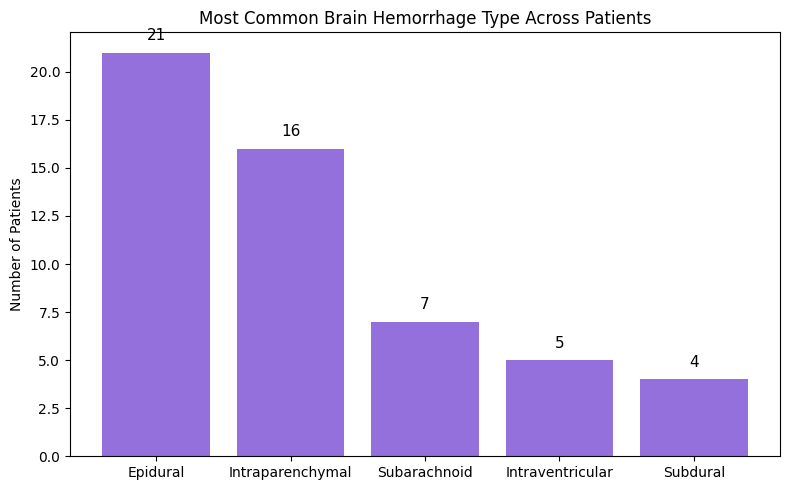

In [ ]:
# List of hemorrhage types
hem_cols = ['Intraventricular', 'Intraparenchymal', 'Subarachnoid', 'Epidural', 'Subdural']

# Count number of unique patients with each hemorrhage type
hemorrhage_patient_counts = {
    hem_type: df[df[hem_type] == 1]['PatientNumber'].nunique()
    for hem_type in hem_cols
}

# Convert to DataFrame for plotting
hem_df = pd.DataFrame.from_dict(hemorrhage_patient_counts, orient='index', columns=['PatientCount'])
hem_df = hem_df.sort_values(by='PatientCount', ascending=False)

# Plotting
plt.figure(figsize=(8, 5))
bars = plt.bar(hem_df.index, hem_df['PatientCount'], color='mediumpurple')
plt.title('Most Common Brain Hemorrhage Type Across Patients')
plt.ylabel('Number of Patients')

# Add count labels on top
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, int(yval), ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.show()

**For patients with fractures, which type of brain hemorrhage is most commonly observed?**

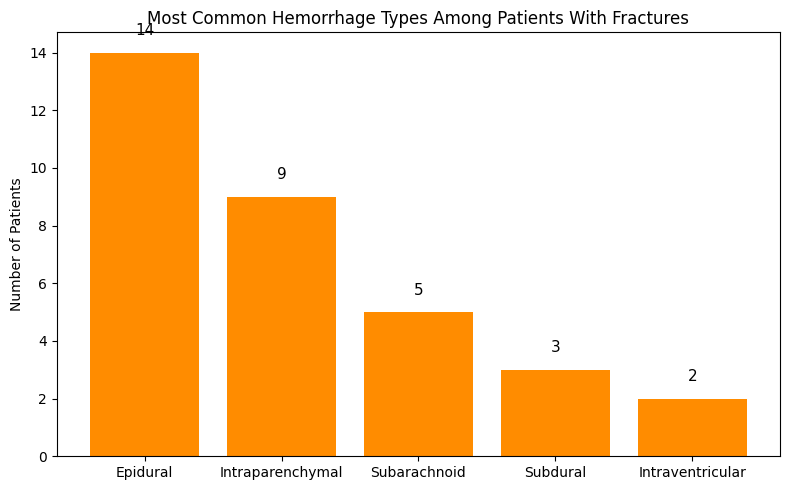

In [ ]:
# Hemorrhage columns
hem_cols = ['Intraventricular', 'Intraparenchymal', 'Subarachnoid', 'Epidural', 'Subdural']

# Step 1: Get patients with at least one fractured slice
fracture_patients = df[df['Fracture_Yes_No'] == 1]['PatientNumber'].unique()

# Step 2: Filter dataset for only those patients
df_fracture = df[df['PatientNumber'].isin(fracture_patients)]

# Step 3: For each hemorrhage type, count unique patients who have it
hemorrhage_counts = {
    hem: df_fracture[df_fracture[hem] == 1]['PatientNumber'].nunique()
    for hem in hem_cols
}

# Convert to DataFrame for plotting
hem_df = pd.DataFrame.from_dict(hemorrhage_counts, orient='index', columns=['PatientCount'])
hem_df = hem_df.sort_values(by='PatientCount', ascending=False)

# Step 4: Plotting
plt.figure(figsize=(8, 5))
bars = plt.bar(hem_df.index, hem_df['PatientCount'], color='darkorange')
plt.title('Most Common Hemorrhage Types Among Patients With Fractures')
plt.ylabel('Number of Patients')

# Add count labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, int(yval), ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.show()

**How many patients have multiple types of brain hemorrhages?**

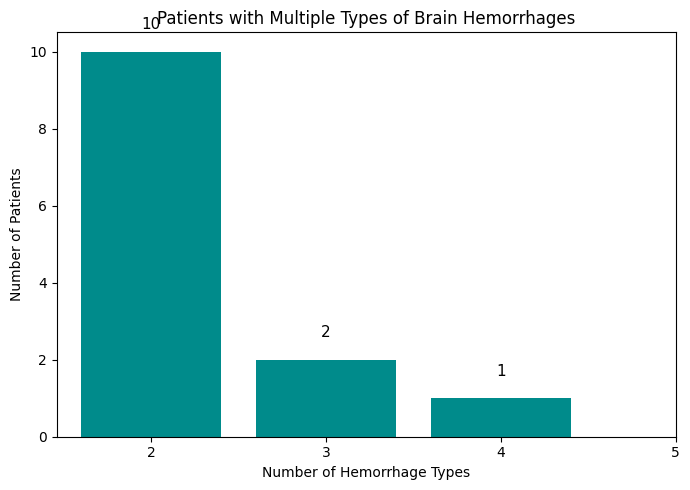

In [ ]:
# Hemorrhage columns
hem_cols = ['Intraventricular', 'Intraparenchymal', 'Subarachnoid', 'Epidural', 'Subdural']

# Group by patient and take max to check if they had each hemorrhage type at least once
patient_hem = df.groupby('PatientNumber')[hem_cols].max()

# Count number of different hemorrhage types per patient
patient_hem['Hem_Type_Count'] = patient_hem.sum(axis=1)

# Filter for patients with multiple hemorrhage types (2 or more)
multi_type_counts = patient_hem['Hem_Type_Count'].value_counts().sort_index()
multi_type_counts = multi_type_counts[multi_type_counts.index >= 2]

# Plotting
plt.figure(figsize=(7, 5))
bars = plt.bar(multi_type_counts.index.astype(int), multi_type_counts.values, color='darkcyan')
plt.title('Patients with Multiple Types of Brain Hemorrhages')
plt.xlabel('Number of Hemorrhage Types')
plt.ylabel('Number of Patients')

# Add count labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, int(yval), ha='center', va='bottom', fontsize=11)

plt.xticks([2, 3, 4, 5])
plt.tight_layout()
plt.show()